In [1]:
from image_aug_utils import Augmentation, parse_via_json, save_mrcnn_labels
from time import sleep
import numpy as np
import random

In [2]:


# Directory in which images exists 
DIR_PATH = "../Annotated_images/wrinkles/"

# Json File Path
doc_labels = "../Annotated_images/wrinkles/via_project_5Feb2022_19h30m.json"


# Rotation angle degree (Rotate image at angle)
degrees = 270

# Parsing Json
images = parse_via_json(doc_labels, DIR_PATH)

# Getting all of the classes from your annotations 
classes = list(set([ __ for _ in images.values() for __ in list(_.keys())]))
print(classes)

# Images you are going to augment should be greater than 1
if len(images) <= 1:
    print("I need at least 2 images")
    exit()

# Spliting train and testing images
total_training = int(len(images) * 0.8)
counter = 0

keys = list(images.keys())
random.shuffle(keys)
images = {key: images[key] for key in keys}


# Initilzing Train and val multiprocessing augmentation class
train = Augmentation(DIR_PATH + "/train/", degrees)
val = Augmentation(DIR_PATH + "/val/", degrees)

print(total_training)

# Creating images
print("Creating Images....")
for image_path in images:
    if  counter < total_training:

        train.run(image_path, images[image_path])
    else:
        val.run(image_path, images[image_path])
    counter += 1


while train.pending > 0 or val.pending > 0:
    print(f"Train Pending  :{train.pending},  Validation Pending: {val.pending}", end= '\r')
    sleep(1)


# Saving Labels
print("Saving Labels into json")
save_mrcnn_labels(train.augmented_images, DIR_PATH + "/train/via_region_data.json", classes)
save_mrcnn_labels(val.augmented_images, DIR_PATH + "/val/via_region_data.json", classes)
file1 = open(DIR_PATH+"labels.txt","w")
write='"' + '","'.join(classes) + '"'
file1.writelines(write)
file1.close()


Traceback (most recent call last):
  File "/Users/sohaibanwar/Documents/Python_training/skinCare/Skin-care/image_augmentation/image_aug_utils.py", line 149, in parse_via_json
    region_name = list(region['region_attributes']['class'].keys())[0]
KeyError: 'class'


['wrinkles ']
16
Creating Images....
Saving Labels into jsonidation Pending: 4


# Image Augmentation Validation

In [3]:
import utils
import skimage

"""Build Dataset."""
print("Loading Training Dataset...")
DATASET_DIR = DIR_PATH

# Training dataset.
dataset_train = utils.GenericDataset()
dataset_train.load_item(DATASET_DIR, "train")
dataset_train.prepare()
print("Training Classes ", dataset_train.class_names)

# Validation dataset
print("\n\nLoading Validation Dataset...")
dataset_val = utils.GenericDataset()
dataset_val.load_item(DATASET_DIR, "val")
dataset_val.prepare()
print("Validation Classes ", dataset_val.class_names)

Loading Training Dataset...
32
Training Classes  ['BG', '1']


Loading Validation Dataset...
8
Validation Classes  ['BG', '1']


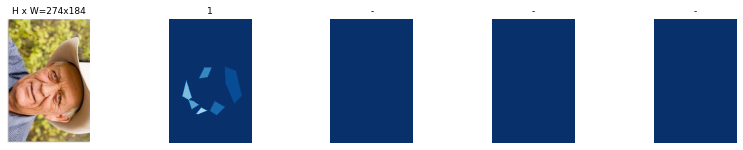

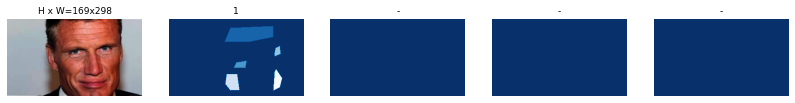

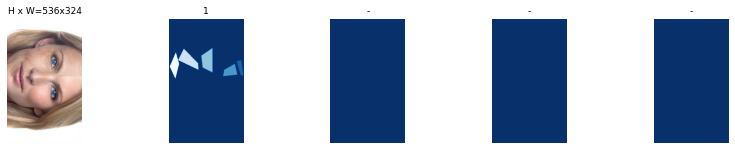

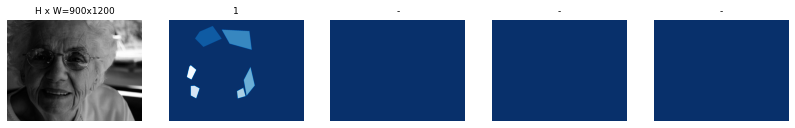

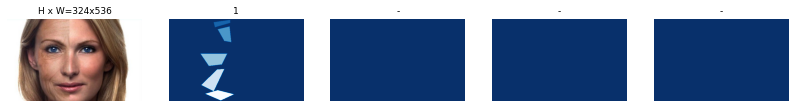

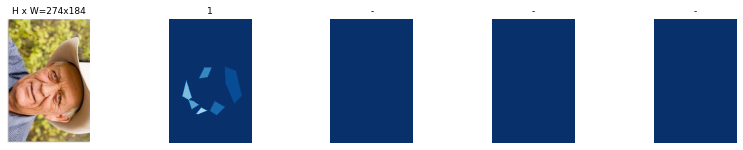

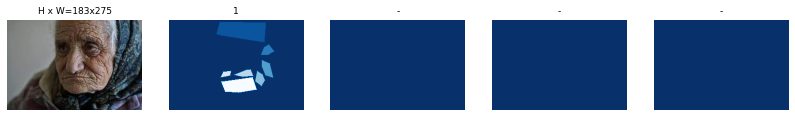

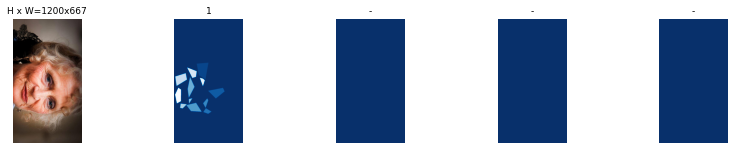

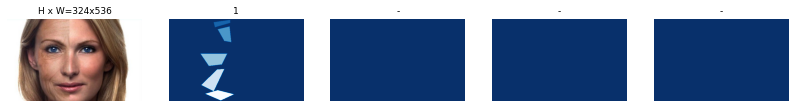

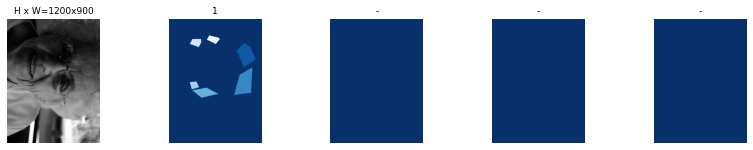

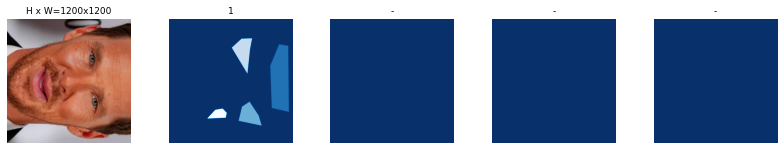

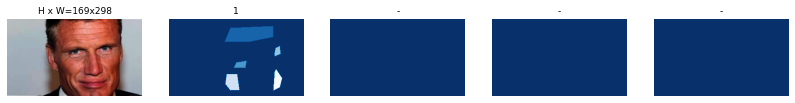

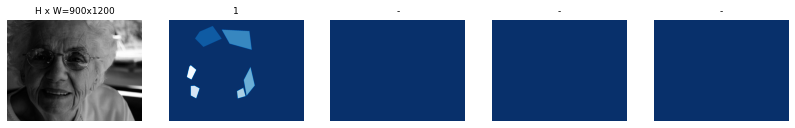

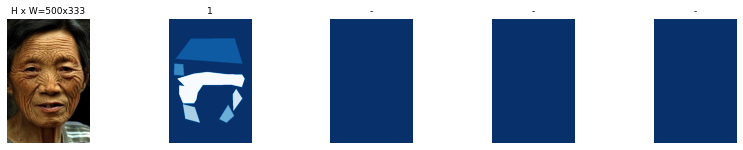

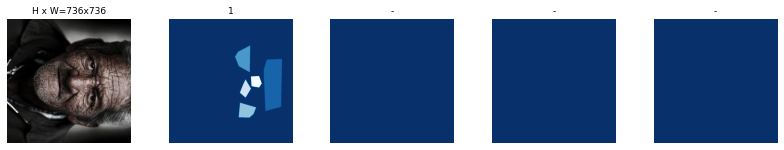

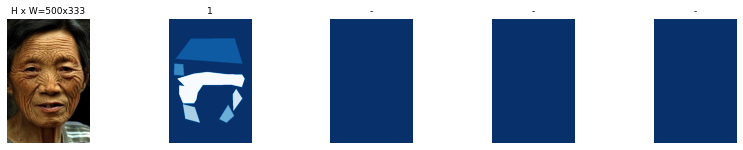

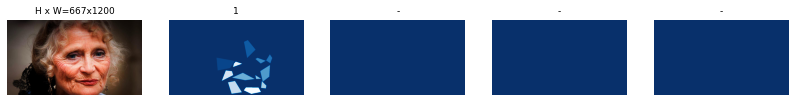

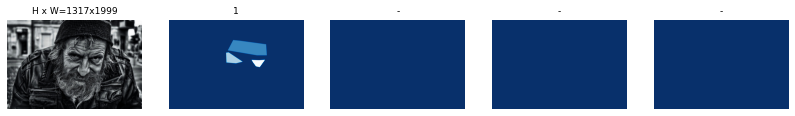

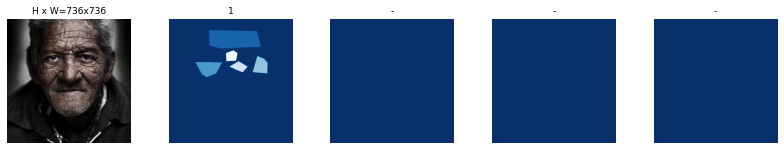

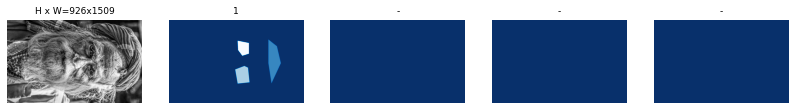

In [4]:
import visualization as vis
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 20)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    vis.display_top_masks(image, mask, class_ids,dataset_train.class_names , limit=4)